In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from sklearn.model_selection import train_test_split

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

import os
print(os.listdir("../input/"))

# Any results you write to the current directory are saved as output.

['insurance.csv']


In [2]:
ins_df = pd.read_csv("../input/insurance.csv")

In [3]:
ins_df.head()

,age,sex,bmi,children,smoker,region,expenses
0,19,female,27.9,0,yes,southwest,16884.92
1,18,male,33.8,1,no,southeast,1725.55
2,28,male,33.0,3,no,southeast,4449.46
3,33,male,22.7,0,no,northwest,21984.47
4,32,male,28.9,0,no,northwest,3866.86


In [4]:
ins_df.isna().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
expenses    0
dtype: int64

In [5]:
#no null values are there
ins_df.tail()

,age,sex,bmi,children,smoker,region,expenses
1333,50,male,31.0,3,no,northwest,10600.55
1334,18,female,31.9,0,no,northeast,2205.98
1335,18,female,36.9,0,no,southeast,1629.83
1336,21,female,25.8,0,no,southwest,2007.95
1337,61,female,29.1,0,yes,northwest,29141.36


In [6]:
ins_df.sex.unique()

array(['female', 'male'], dtype=object)

In [7]:
num_col = ins_df.select_dtypes(include=np.number).columns
num_col

Index(['age', 'bmi', 'children', 'expenses'], dtype='object')

In [8]:
cat_col = ins_df.select_dtypes(exclude=np.number).columns
cat_col

Index(['sex', 'smoker', 'region'], dtype='object')

In [9]:
#one hot encoding 
encoded_cat_col = pd.get_dummies(ins_df[cat_col])
encoded_cat_col

,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,1,0,0,1,0,0,0,1
1,0,1,1,0,0,0,1,0
2,0,1,1,0,0,0,1,0
3,0,1,1,0,0,1,0,0
4,0,1,1,0,0,1,0,0
5,1,0,1,0,0,0,1,0
6,1,0,1,0,0,0,1,0
7,1,0,1,0,0,1,0,0
8,0,1,1,0,1,0,0,0
9,1,0,1,0,0,1,0,0


In [10]:
ins_df_ready_model = pd.concat([ins_df[num_col],encoded_cat_col], axis=1)
ins_df_ready_model
ins_df_ready_model.corr()

,age,bmi,children,expenses,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
age,1.000000,0.109341,0.042469,0.299008,0.020856,-0.020856,0.025019,-0.025019,0.002475,-0.000407,-0.011642,0.010016
bmi,0.109341,1.000000,0.012645,0.198576,-0.046380,0.046380,-0.003968,0.003968,-0.138091,-0.135992,0.270144,-0.006398
children,0.042469,0.012645,1.000000,0.067998,-0.017163,0.017163,-0.007673,0.007673,-0.022808,0.024806,-0.023066,0.021914
expenses,0.299008,0.198576,0.067998,1.000000,-0.057292,0.057292,-0.787251,0.787251,0.006349,-0.039905,0.073982,-0.043210
sex_female,0.020856,-0.046380,-0.017163,-0.057292,1.000000,-1.000000,0.076185,-0.076185,0.002425,0.011156,-0.017117,0.004184
sex_male,-0.020856,0.046380,0.017163,0.057292,-1.000000,1.000000,-0.076185,0.076185,-0.002425,-0.011156,0.017117,-0.004184
smoker_no,0.025019,-0.003968,-0.007673,-0.787251,0.076185,-0.076185,1.000000,-1.000000,-0.002811,0.036945,-0.068498,0.036945
smoker_yes,-0.025019,0.003968,0.007673,0.787251,-0.076185,0.076185,-1.000000,1.000000,0.002811,-0.036945,0.068498,-0.036945
region_northeast,0.002475,-0.138091,-0.022808,0.006349,0.002425,-0.002425,-0.002811,0.002811,1.000000,-0.320177,-0.345561,-0.320177
region_northwest,-0.000407,-0.135992,0.024806,-0.039905,0.011156,-0.011156,0.036945,-0.036945,-0.320177,1.000000,-0.346265,-0.320829


In [11]:
y_axis = ins_df_ready_model['expenses']
x_axis = ins_df_ready_model.drop(columns='expenses')

In [12]:
train_x,test_x,train_y,test_y = train_test_split(x_axis,y_axis, test_size=0.3)

In [13]:
from sklearn.linear_model import LinearRegression
model= LinearRegression()

In [14]:
model.fit(train_x,train_y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [15]:
train_predict = model.predict(train_x)

test_predict = model.predict(test_x)


In [16]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

MAE_train = mean_absolute_error(train_y,train_predict)
MAE_test = mean_absolute_error(test_y,test_predict)

MSE_train = mean_squared_error(train_y,train_predict)
MSE_test = mean_squared_error(test_y,test_predict)

RMSE_train = np.sqrt(MSE_train)
RMSE_test = np.sqrt(MSE_test)

Mape_train = np.mean(np.abs((train_y,train_predict)))
Mape_test = np.mean(np.abs((test_y,test_predict)))

print("MAE of Trained data : ",MAE_train)
print("MAE of Test data    : ", MAE_test)

print("~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~")

print("MSE of Trained Data", MSE_train)
print("MSE of Test Data", MSE_test)

print("~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~")

print("RMSE of Trained Data", RMSE_train)
print("RMSE of Test Data", RMSE_test)

print('~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~')
print("Mape of train :, ",Mape_train)
print("Mape of test :, ",Mape_test)



MAE of Trained data :  3970.994377853393
MAE of Test data    :  4396.55328671603
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
MSE of Trained Data 34478438.850144476
MSE of Test Data 41846081.38321063
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
RMSE of Trained Data 5871.834368418823
RMSE of Test Data 6468.854719593773
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Mape of train :,  13461.87889004483
Mape of test :,  12937.456205774952


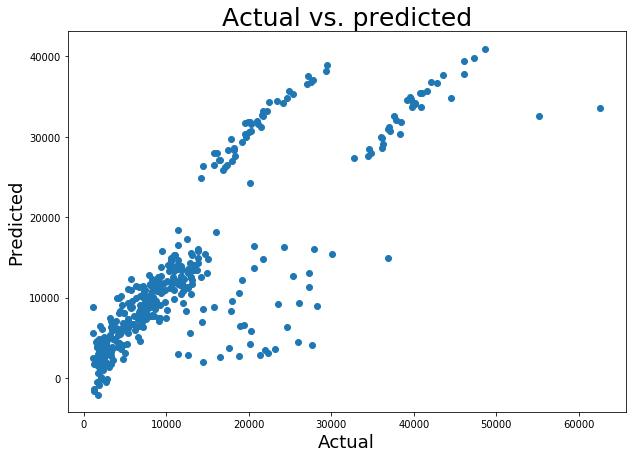

In [17]:
import matplotlib.pyplot as plot
%matplotlib inline

plot.figure(figsize=(10,7))
plot.title("Actual vs. predicted",fontsize=25)
plot.xlabel("Actual",fontsize=18)
plot.ylabel("Predicted", fontsize=18)
plot.scatter(x=test_y,y=test_predict)